# Data Collection and Analysis

### This document is for working with the data we pull from training the different mdoels.

Import libraries

In [189]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

Load data from file

In [193]:
def load_data(file_path, model=None):
    # file_path = 'DQL_PLOT/TEST_PLOTS/plot_file_vector.pkl'
    # file_path = 'DQL_PLOT/TEST_PLOTS/plot_file_grid.pkl'

    with open(file_path, 'rb') as file:
        data = pickle.load(file)
        data = np.array(data)
    
        
    # load data as dataframe
    if model == 'tql': data = {'scores': data[0]/10, 'apple': data[1], 'time per apple': data[1] / (data[0]/10)}
    else: data = {'scores': data[0]/10,
            'steps_per_game': data[1],
            'epsilon': data[2],
            'game': np.arange(len(data[0])),
            'steps' : np.cumsum(data[1]),
            'time per apple': data[1] / (data[0]/10)
            }
    dataframe = pd.DataFrame(data = data)

    return dataframe 

# pilot test load
onestep_pilot = load_data(file_path='DQL_PLOT/DATA_PLOTS/onestep_non_training_17_01.pkl')
vector_pilot = load_data(file_path='DQL_PLOT/DATA_PLOTS/vector_non_training_17_01.pkl')
tql_pilot = load_data(file_path='TAB_MODEL_AND_PLOT/DATA_PLOT_RUNNING/tab_optim_rewards_running.pkl', model="tql")
rand_pilot = load_data(file_path='DQL_PLOT/DATA_PLOTS/random_non_training_18_01.pkl', model="tql")
grid_pilot = load_data(file_path='DQL_PLOT/DATA_PLOTS/grid_non_training_pt2_18_01.pkl')
grid_pilot = grid_pilot.head(25_000)
grid_train = load_data(file_path='DQL_PLOT/TEST_PLOTS/grid_training_18_01.pkl')
grid_train = grid_train.tail(45_000).reset_index(drop=True)

# Part 2 test load
onestepv2 = load_data(file_path='DQL_PLOT/DATA_PLOTS/onestep_non_training_pt2_18_01.pkl')
vectorv2 = load_data(file_path='DQL_PLOT/DATA_PLOTS/vector_non_training_pt2_18_01.pkl')
randv2 = load_data(file_path='DQL_PLOT/DATA_PLOTS/random_non_training_pt3_18_01.pkl', model="tql")
tqlv2 = load_data(file_path='TAB_MODEL_AND_PLOT/DATA_PLOT_RUNNING/tab_optim_rewards_running_pt2.pkl', model="tql")

# sammenslutning af data
onestep = pd.concat((onestep_pilot, onestepv2), ignore_index=True)
rand = randv2 # pd.concat((rand_pilot, randv2), ignore_index=True)
vector = pd.concat((vector_pilot, vectorv2), ignore_index=True)
tql = pd.concat((tql_pilot, tqlv2), ignore_index=True)
grid = load_data(file_path='DQL_PLOT/DATA_PLOTS/grid_non_training_pt2_18_01.pkl')


df_results_pilot = pd.DataFrame(data= {'onestep_score': onestep_pilot['scores'], 'vector_score': vector_pilot['scores'], 
                                       'tql_score': tql_pilot['scores'], 'rand_score': rand_pilot['scores'], 'grid_score': grid_pilot['scores']})

df_results = pd.DataFrame(data= {'onestep_score': onestep['scores'], 'vector_score': vector['scores'],
                                  'tql_score': tql['scores'], 'rand_score': rand['scores'], 'grid_score': grid['scores'],'grid_train_score': grid_train['scores']})

# Outliers removed, calculated by 1.5*IQR in R
df_time = pd.DataFrame(data= {'onestep_time': onestep['time per apple'].clip(10.08, 19.2), 'vector_time': vector['time per apple'].clip(10.67, 20.45), 
                              'tql_time': tql['time per apple'].clip(14.83, 31)})

df_time_outliers = pd.DataFrame(data= {'onestep_time': onestep['time per apple'], 'vector_time': vector['time per apple'], 
                              'tql_time': tql['time per apple'], 'rand_time': rand['time per apple'], 'grid_time': grid['time per apple'], 'grid_train_time': grid_train['time per apple']})

df_time_outliers = df_time_outliers.replace(np.inf, 0)


C:\Users\vietn\AppData\Local\Temp\ipykernel_16100\880248704.py:11: RuntimeWarning: divide by zero encountered in divide
  if model == 'tql': data = {'scores': data[0]/10, 'apple': data[1], 'time per apple': data[1] / (data[0]/10)}
C:\Users\vietn\AppData\Local\Temp\ipykernel_16100\880248704.py:17: RuntimeWarning: divide by zero encountered in divide
  'time per apple': data[1] / (data[0]/10)


## Sample size 

In [190]:
# Sample size calculation
def sample_size(df):
    z = 1.96**2
    var = df.var()
    e = 1.**2
    return z * (var/e)

sample_size(df_results_pilot)


onestep_score    353.642193
vector_score     422.279846
tql_score        415.389703
rand_score         0.434664
grid_score         0.447227
dtype: float64

## Konfidence intervaller

In [191]:
# Funktion for konfidensinterval
def confint(df):

    # Definere variabler
    df_mean = df.mean()
    df_std = df.std()
    sqrt_n = np.sqrt(len(df))
    z_score = 1.96

    # Udregn konfidensinterval lower og upper bound
    lower = df_mean - z_score * (df_std / sqrt_n)
    upper = df_mean + z_score * (df_std / sqrt_n)

    # kombiner lower og upper bound i en dataframe
    data = {'lower': lower.round(3), 'upper': upper.round(3)}
    df_confint = pd.DataFrame(data=data)

    return df_confint


display(confint(df_results), confint(df_time_outliers))

,lower,upper
onestep_score,25.127,25.304
vector_score,28.668,28.861
tql_score,26.030,26.222
rand_score,0.117,0.124
grid_score,0.107,0.113
grid_train_score,0.203,0.212


,lower,upper
onestep_time,14.606,14.639
vector_time,15.760,15.911
tql_time,23.725,24.105
rand_time,6.438,6.873
grid_time,20.691,22.353
grid_train_time,37.126,39.253


## Line Plots

C:\Users\vietn\AppData\Local\Temp\ipykernel_16100\1096796598.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_results[['onestep_score', 'vector_score', 'tql_score']], shade=True, alpha=0.2)


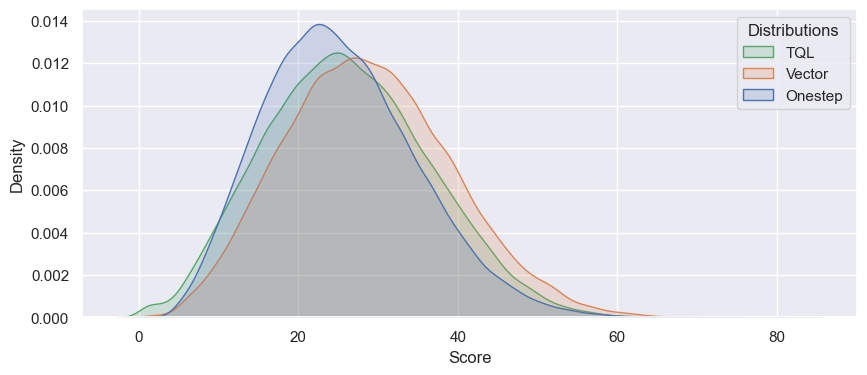

In [194]:
plt.figure(figsize=(10, 4))

# Plot the three normal distributions together
sns.set_theme(style="darkgrid")
sns.kdeplot(df_results[['onestep_score', 'vector_score', 'tql_score']], shade=True, alpha=0.2)

# Add labels and a legend
plt.xlabel("Score")
plt.ylabel("Density")
plt.legend(title="Distributions", labels=["TQL", "Vector", "Onestep"])

# Show the plot
plt.show()


C:\Users\vietn\AppData\Local\Temp\ipykernel_16100\1408693547.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_time, shade=True, alpha=0.2)


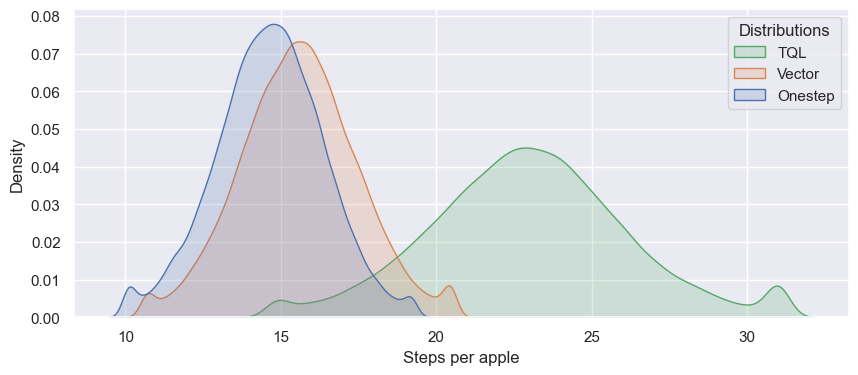

In [196]:
plt.figure(figsize=(10, 4))

# Plot the three normal distributions together
sns.set_theme(style="darkgrid")
sns.kdeplot(df_time, shade=True, alpha=0.2)

# Add labels and a legend
plt.xlabel("Steps per apple")
plt.ylabel("Density")
plt.legend(title="Distributions", labels=["TQL", "Vector", "Onestep"])

# Show the plot
plt.show()


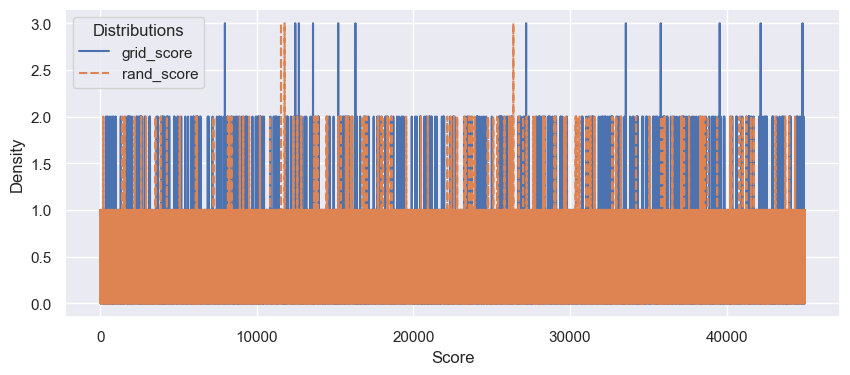

In [138]:
plt.figure(figsize=(10, 4))

# Plot the three normal distributions together
sns.set_theme(style="darkgrid")
sns.lineplot(df_results[['grid_score', 'rand_score']])

# Add labels and a legend
plt.xlabel("Score")
plt.ylabel("Density")
plt.legend(title="Distributions")

# Show the plot
plt.show()

/var/folders/tc/p_2dw00d5zg0svx3_qj__8tc0000gn/T/ipykernel_91623/3182173228.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_time, shade=True, alpha=0.2)


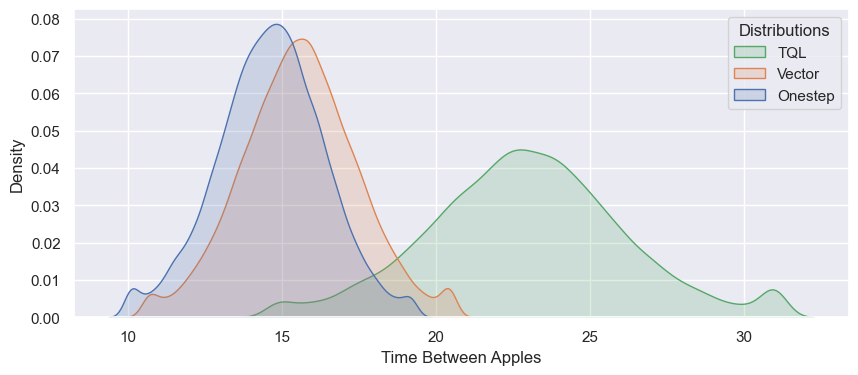

In [14]:
plt.figure(figsize=(10, 4))

# Plot the three normal distributions together
sns.set_theme(style="darkgrid")
sns.kdeplot(data=df_time, shade=True, alpha=0.2)

# Add labels and a legend
plt.xlabel("Time Between Apples")
plt.ylabel("Density")
plt.legend(title="Distributions", labels=["TQL", "Vector", "Onestep"])

# Show the plot
plt.show()


## Export CSV

In [12]:
# Export as csv from pickle
def export_csv(dataframe=None, save_path=None):
    return dataframe.to_csv(save_path, index=False)

# input variables
dataframe = tql
save_path='TAB_MODEL_AND_PLOT/DATA_PLOT_RUNNING/tab_optim_rewards_running.csv'

# Export to csv
export_csv(dataframe, save_path)
